## Art Style Classifier


In [19]:
#|default_exp app


In [1]:
#|export 
from fastai.vision.all import *
from fastcore.all import *
from fastbook import *
import gradio as gr

In [3]:
#|export
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath

In [4]:
#|export
# create function to search for images
def search_images(image_name, max_images=100, test=False):
    if test==True:
        print(image_name)
        url = search_images_ddg(image_name, max_images=max_images)
    else:
        print(f'Searching for: {image_name}')
        url = search_images_ddg(image_name, max_images=max_images)
    return url

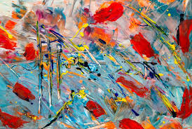

In [5]:
# view image 
im = PILImage.create('abstractexpressionism.jpg')
im.thumbnail((192, 192))
im

In [6]:
#|export
learn = load_learner('model.pkl')

In [7]:
# sample prediction
%time learn.predict('abstractexpressionism.jpg')

CPU times: total: 375 ms
Wall time: 260 ms


('abstract expressionism',
 tensor(0),
 tensor([1.0000e+00, 3.2262e-08, 8.5299e-08]))

In [8]:
#|export
art_styles = ('abstract expressionism', 'cubism', 'surrealism', )

def classify_art(img):
    pred, idx, probs = learn.predict(img)
    output = dict(zip(art_styles, map(float, probs)))
    return output 

In [9]:
classify_art('abstractexpressionism.jpg')

{'abstract expressionism': 0.9999998807907104,
 'cubism': 3.226210409934538e-08,
 'surrealism': 8.529929118594737e-08}

In [10]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['abstractexpressionism.jpg', 'cubism.jpg', 'surrealism.jpg']

interface = gr.Interface(fn=classify_art, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [2]:
from nbdev.export import nb_export
nb_export('app_model_integration.ipynb', '.')
print('Export successful')

Export successful
